In [37]:
import pandas as pd
df=pd.read_csv('Documents\customer_shopping_behavior.csv')

In [38]:
df.head(10)

Customer ID  Age Gender Item Purchased     Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse     Clothing                     53   
1            2   19   Male        Sweater     Clothing                     64   
2            3   50   Male          Jeans     Clothing                     73   
3            4   21   Male        Sandals     Footwear                     90   
4            5   45   Male         Blouse     Clothing                     49   
5            6   46   Male       Sneakers     Footwear                     20   
6            7   63   Male          Shirt     Clothing                     85   
7            8   27   Male         Shorts     Clothing                     34   
8            9   26   Male           Coat    Outerwear                     97   
9           10   57   Male        Handbag  Accessories                     31   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   
5        Wyoming    M      White  Summer            2.9                 Yes   
6        Montana    M       Gray    Fall            3.2                 Yes   
7      Louisiana    L   Charcoal  Winter            3.2                 Yes   
8  West Virginia    L     Silver  Summer            2.6                 Yes   
9       Missouri    M       Pink  Spring            4.8                 Yes   

    Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0         Express              Yes             Yes                  14   
1         Express              Yes             Yes                   2   
2   Free Shipping              Yes             Yes                  23   
3    Next Day Air              Yes             Yes                  49   
4   Free Shipping              Yes             Yes                  31   
5        Standard              Yes             Yes                  14   
6   Free Shipping              Yes             Yes                  49   
7   Free Shipping              Yes             Yes                  19   
8         Express              Yes             Yes                   8   
9  2-Day Shipping              Yes             Yes                   4   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually  
5          Venmo                 Weekly  
6           Cash              Quarterly  
7    Credit Card                 Weekly  
8          Venmo               Annually  
9           Cash              Quarterly

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [40]:
df.describe()

Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3863.000000   
mean   1950.500000    44.068462              59.764359       3.750065   
std    1125.977353    15.207589              23.685392       0.716983   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.800000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

In [41]:
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [42]:
df['Review Rating'].fillna(df['Review Rating'].median())

0       3.1
1       3.1
2       3.1
3       3.5
4       2.7
       ... 
3895    4.2
3896    4.5
3897    2.9
3898    3.8
3899    3.1
Name: Review Rating, Length: 3900, dtype: float64

In [43]:
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [44]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_') 
df=df.rename(columns={'purchase_amount_(usd)':'purchase_amount'})

In [45]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [46]:
#creating a columns age_group
labels=['Young Adult','Adult','Middle aged','Senior']
df['age_group']=pd.qcut(df['age'],q=4,labels=labels)

In [47]:
df[['age','age_group']].head(10)

age    age_group
0   55  Middle aged
1   19  Young Adult
2   50  Middle aged
3   21  Young Adult
4   45  Middle aged
5   46  Middle aged
6   63       Senior
7   27  Young Adult
8   26  Young Adult
9   57  Middle aged

In [48]:
#create column purchase_freaquency
frequency_mapping={
'Fortnightly':14,
    'Weekly':7,
    'Monthly':30,
    'Quartertly':90,
'Bi-Weekly':14,
    'Annually':365,
    'Every 3 Months':90
}
df['purchase_frequency']=df['frequency_of_purchases'].map(frequency_mapping)

In [49]:
df[['purchase_frequency','frequency_of_purchases']].head()

purchase_frequency frequency_of_purchases
0                14.0            Fortnightly
1                14.0            Fortnightly
2                 7.0                 Weekly
3                 7.0                 Weekly
4               365.0               Annually

In [50]:
df[['discount_applied','promo_code_used']].head(10)

discount_applied promo_code_used
0              Yes             Yes
1              Yes             Yes
2              Yes             Yes
3              Yes             Yes
4              Yes             Yes
5              Yes             Yes
6              Yes             Yes
7              Yes             Yes
8              Yes             Yes
9              Yes             Yes

In [51]:
df=df.drop('promo_code_used',axis=1)

In [52]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency'],
      dtype='object')

In [53]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency'],
      dtype='object')

In [54]:
#connect to MYSQL
#Replacing the data
import mysql.connector
mydb=mysql.connector.connect(
host="localhost",
user="root",
password="Vijay@28",
database="mohan"
)
print("connected")

connected


In [20]:
df.to_csv('Documents/customer_shopping_behavior.csv',index=False)

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
sns.set(style='whitegrid')
pd.read_csv("Documents\project\customer_shopping_behavior.csv")

customer_id  age  gender item_purchased     category  purchase_amount  \
0               1   55    Male         Blouse     Clothing               53   
1               2   19    Male        Sweater     Clothing               64   
2               3   50    Male          Jeans     Clothing               73   
3               4   21    Male        Sandals     Footwear               90   
4               5   45    Male         Blouse     Clothing               49   
...           ...  ...     ...            ...          ...              ...   
3895         3896   40  Female         Hoodie     Clothing               28   
3896         3897   52  Female       Backpack  Accessories               49   
3897         3898   46  Female           Belt  Accessories               33   
3898         3899   44  Female          Shoes     Footwear               77   
3899         3900   52  Female        Handbag  Accessories               81   

           location size      color  season  review_rating  \
0          Kentucky    L       Gray  Winter            3.1   
1             Maine    L     Maroon  Winter            3.1   
2     Massachusetts    S     Maroon  Spring            3.1   
3      Rhode Island    M     Maroon  Spring            3.5   
4            Oregon    M  Turquoise  Spring            2.7   
...             ...  ...        ...     ...            ...   
3895       Virginia    L  Turquoise  Summer            4.2   
3896           Iowa    L      White  Spring            4.5   
3897     New Jersey    L      Green  Spring            2.9   
3898      Minnesota    S      Brown  Summer            3.8   
3899     California    M      Beige  Spring            3.1   

     subscription_status   shipping_type discount_applied  previous_purchases  \
0                    Yes         Express              Yes                  14   
1                    Yes         Express              Yes                   2   
2                    Yes   Free Shipping              Yes                  23   
3                    Yes    Next Day Air              Yes                  49   
4                    Yes   Free Shipping              Yes                  31   
...                  ...             ...              ...                 ...   
3895                  No  2-Day Shipping               No                  32   
3896                  No    Store Pickup               No                  41   
3897                  No        Standard               No                  24   
3898                  No         Express               No                  24   
3899                  No    Store Pickup               No                  33   

     payment_method frequency_of_purchases    age_group  purchase_frequency  
0             Venmo            Fortnightly  Middle aged                14.0  
1              Cash            Fortnightly  Young Adult                14.0  
2       Credit Card                 Weekly  Middle aged                 7.0  
3            PayPal                 Weekly  Young Adult                 7.0  
4            PayPal               Annually  Middle aged               365.0  
...             ...                    ...          ...                 ...  
3895          Venmo                 Weekly        Adult                 7.0  
3896  Bank Transfer              Bi-Weekly  Middle aged                14.0  
3897          Venmo              Quarterly  Middle aged                 NaN  
3898          Venmo                 Weekly        Adult                 7.0  
3899          Venmo              Quarterly  Middle aged                 NaN  

[3900 rows x 19 columns]

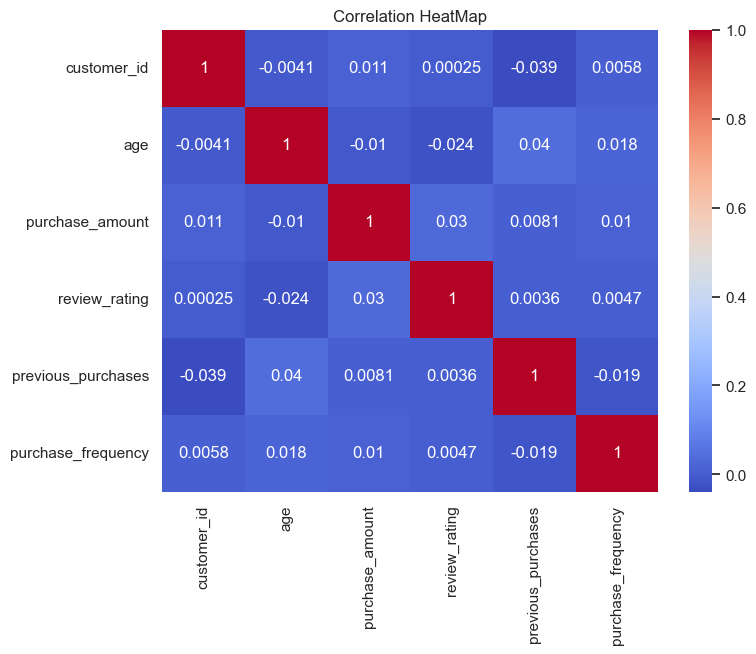

In [82]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Correlation HeatMap")
plt.show()

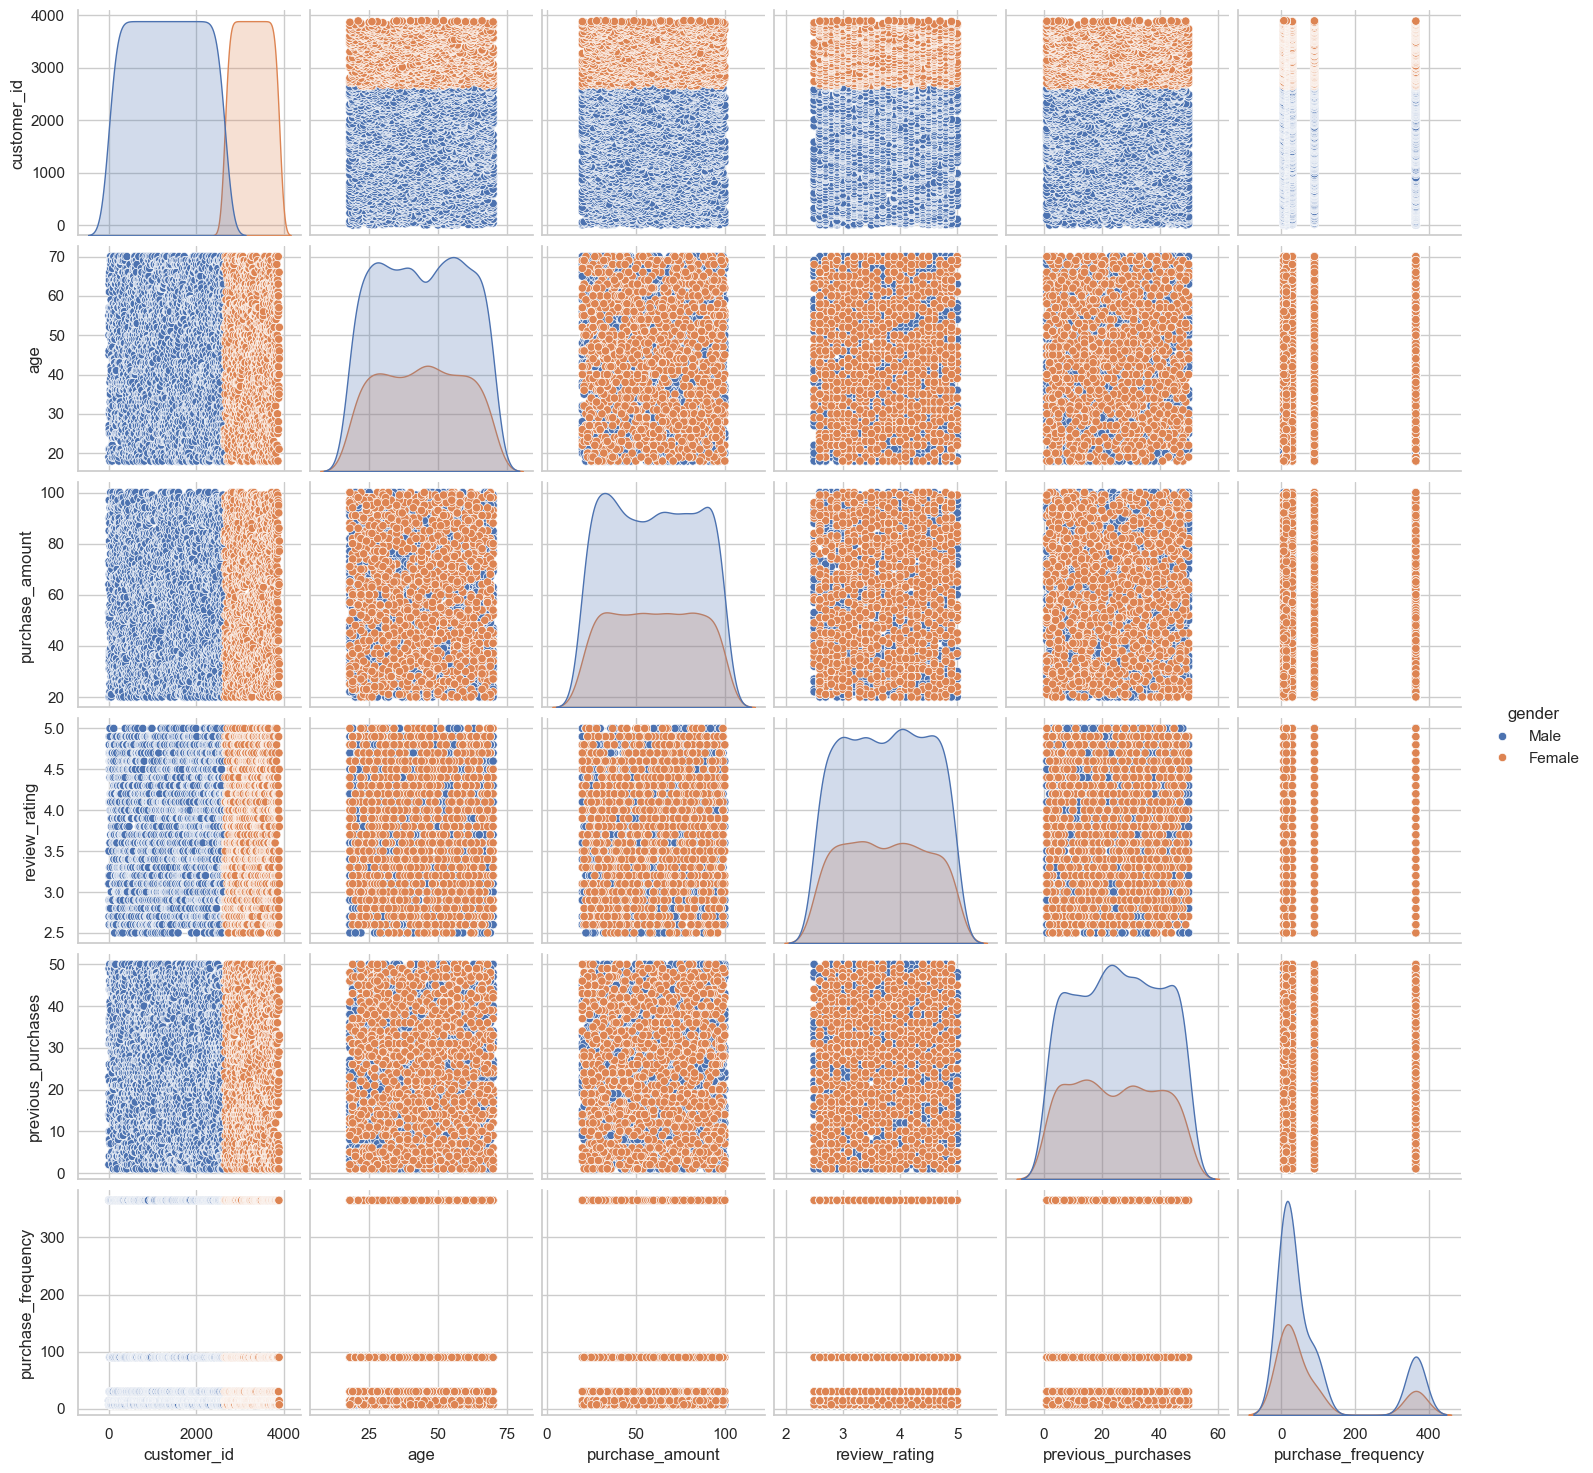

In [83]:
sns.pairplot(df,hue="gender")
plt.show()

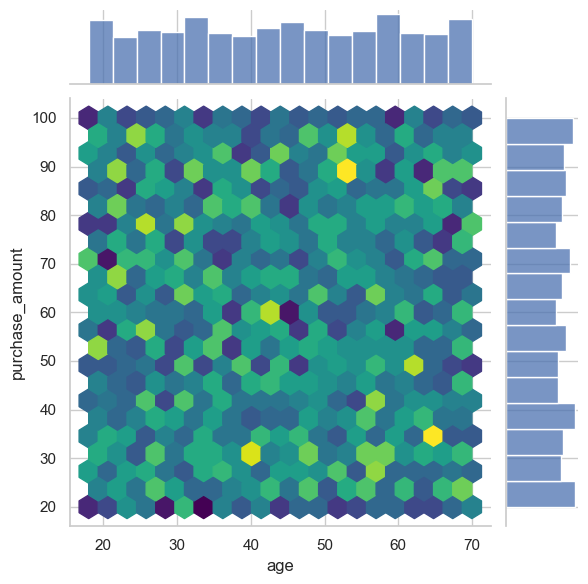

In [84]:
sns.jointplot(data=df,x="age",y="purchase_amount",kind="hex",gridsize=20,cmap="viridis")
plt.show()

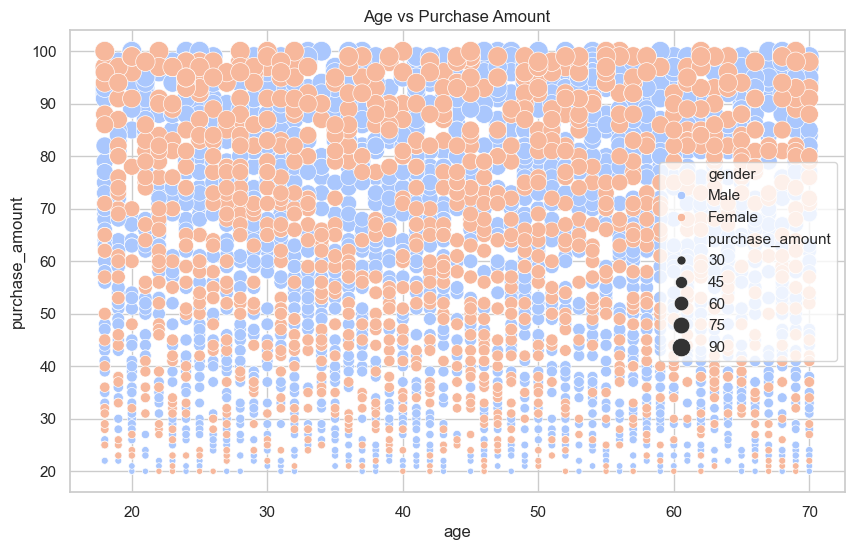

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="age",y="purchase_amount",hue="gender",size="purchase_amount",palette="coolwarm",sizes=(20,200))
plt.title("Age vs Purchase Amount")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11552\2622256194.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df.gender=="Male"]["purchase_amount"],shade=True,label="Male")
C:\Users\Admin\AppData\Local\Temp\ipykernel_11552\2622256194.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df.gender=="Female"]["purchase_amount"],shade=True,label="Female")


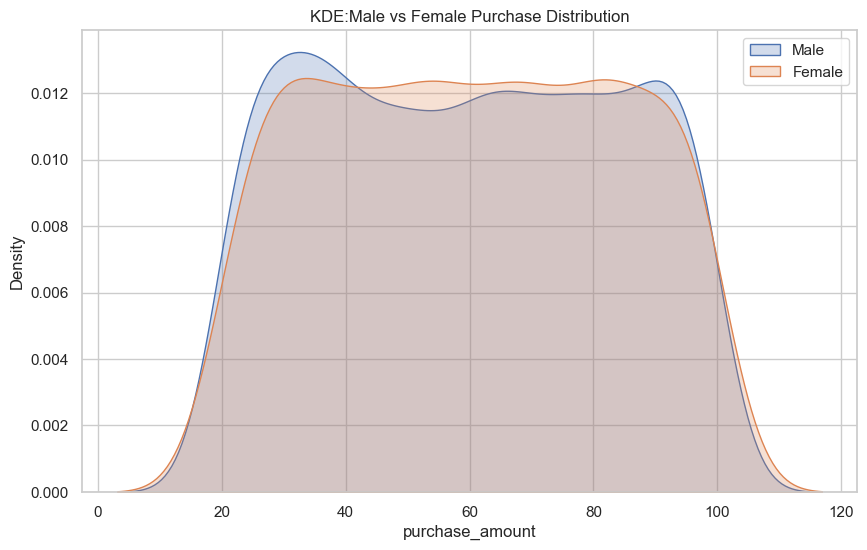

In [67]:
#KDE DENSITY COMPARISON
plt.figure(figsize=(10,6))
sns.kdeplot(df[df.gender=="Male"]["purchase_amount"],shade=True,label="Male")
sns.kdeplot(df[df.gender=="Female"]["purchase_amount"],shade=True,label="Female")
plt.title("KDE:Male vs Female Purchase Distribution")
plt.legend()
plt.show()

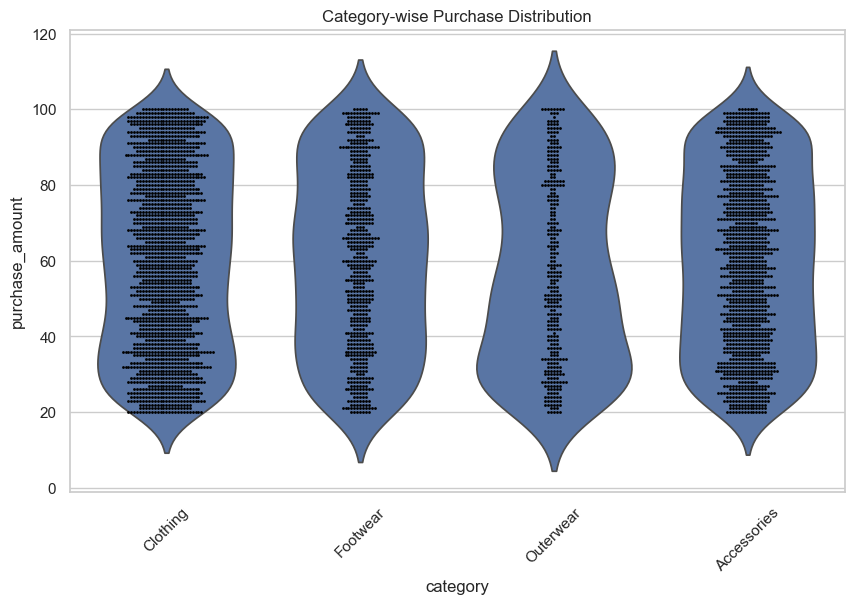

In [70]:
#VIOLIN SWARM COMBO
plt.figure(figsize=(10,6))
sns.violinplot(x="category",y="purchase_amount",data=df,inner=None)
sns.swarmplot(x="category",y="purchase_amount",data=df,color="black",size=2)
plt.xticks(rotation=45)
plt.title("Category-wise Purchase Distribution")
plt.show()

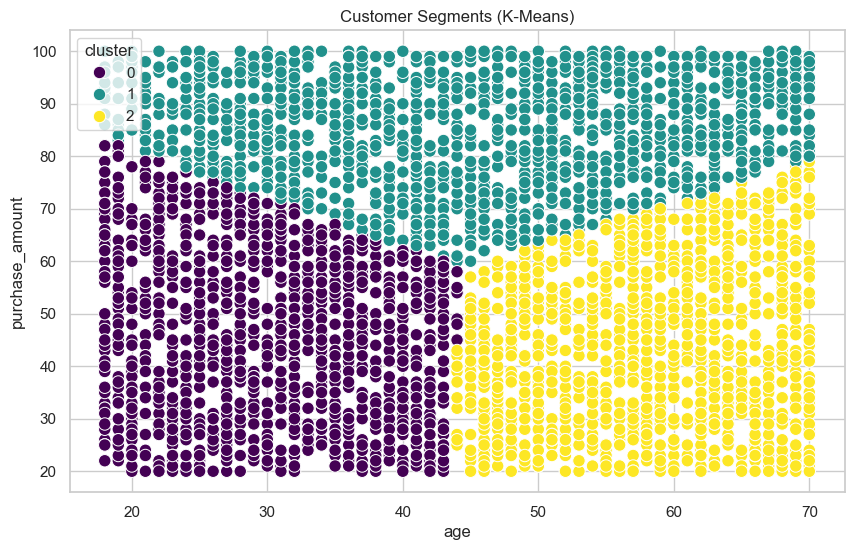

In [85]:
features = df[["age", "purchase_amount"]]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3)
df["cluster"] = kmeans.fit_predict(scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x="age", 
    y="purchase_amount",
    hue="cluster",
    palette="viridis",
    s=80
)
plt.title("Customer Segments (K-Means)")
plt.show()


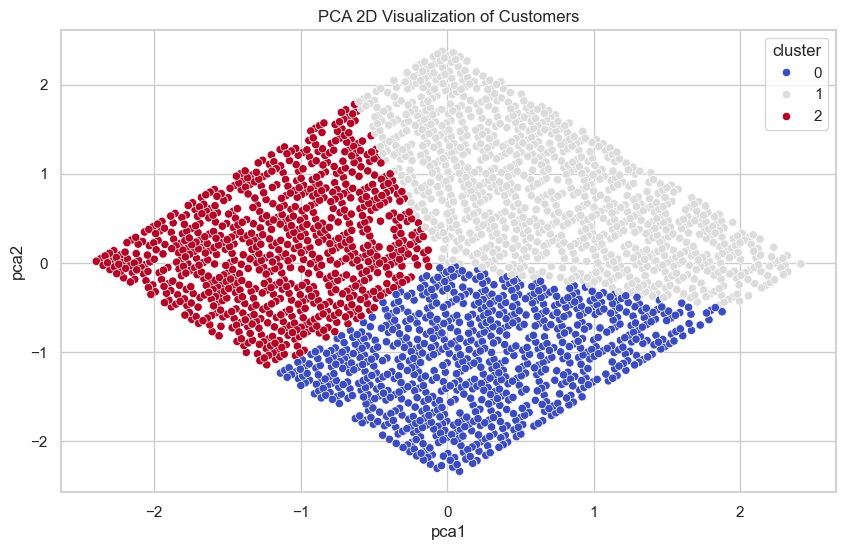

In [86]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled)

df["pca1"] = pca_features[:,0]
df["pca2"] = pca_features[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="pca1",
    y="pca2",
    hue="cluster",
    palette="coolwarm"
)
plt.title("PCA 2D Visualization of Customers")
plt.show()


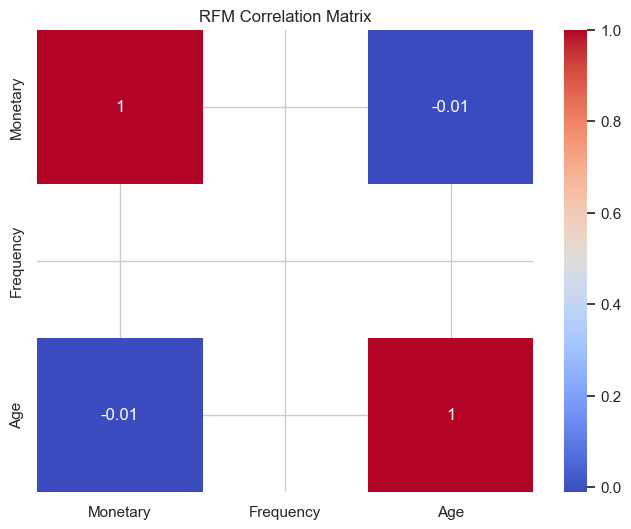

In [87]:
# 7. RFM ANALYSIS (Recency, Frequency, Monetary)
# if purchase_count is available, otherwise use sample frequency = 1
df["frequency"] = 1  

rfm = df.groupby("customer_id").agg({
    "purchase_amount": "sum",
    "frequency": "count",
    "age": "mean"
})

rfm.rename(columns={
    "purchase_amount": "Monetary",
    "frequency": "Frequency",
    "age": "Age"
}, inplace=True)

plt.figure(figsize=(8,6))
sns.heatmap(rfm.corr(), annot=True, cmap="coolwarm")
plt.title("RFM Correlation Matrix")
plt.show()


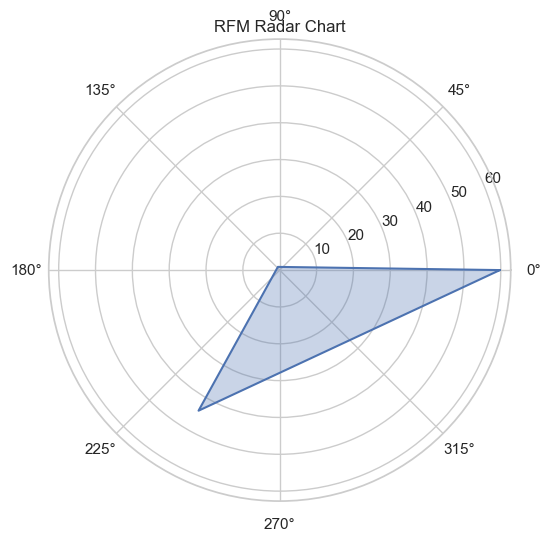

In [89]:
import numpy as np
rfm_means = rfm.mean()
labels = rfm_means.index
values = rfm_means.values

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

plt.figure(figsize=(6,6))
plt.polar(angles, values)
plt.fill(angles, values, alpha=0.3)
plt.title("RFM Radar Chart")
plt.show()
